In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import sin, cos, sqrt, atan2, radians
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer
import ast 
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import chi2_contingency

plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

I will import the dataframe since I have cleaned the data to use.

In [2]:
df = pd.read_csv('final_data.csv', index_col=0)

In [3]:
df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
0,0,1,1,Manhattan,2,1.0,1.0,175.0,1,30,60,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,Brooklyn,3,1.0,3.0,75.0,1,13,21,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,Brooklyn,2,1.0,1.0,60.0,1,30,60,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,Brooklyn,4,2.0,2.0,175.0,1,12,12,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,Manhattan,2,1.0,1.0,65.0,1,17,44,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [4]:
dropped_df = df[df['price']<160]

In [5]:
dropped_df

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
1,0,1,1,Brooklyn,3,1.0,3.0,75.0,1,13,21,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,Brooklyn,2,1.0,1.0,60.0,1,30,60,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
4,0,1,0,Manhattan,2,1.0,1.0,65.0,1,17,44,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
5,0,1,1,Manhattan,1,1.0,1.0,75.0,1,0,0,118,0,0,0,1,0,1,0,171,11.0,4.317488,2.289935,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
6,1,1,1,Manhattan,2,1.0,1.0,140.0,1,9,9,161,0,0,0,4,2,0,2,168,11.0,4.941642,7.800726,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,0,1,1,Manhattan,2,1.0,1.0,145.0,1,14,44,0,0,0,0,1,1,0,0,0,6.0,4.976734,5.413953,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
46523,1,1,1,Manhattan,2,1.0,1.0,87.0,1,25,55,0,0,0,1,2,2,0,0,0,1.0,4.465908,9.177431,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
46524,0,1,1,Brooklyn,4,4.0,4.0,59.0,1,30,60,0,0,0,0,1,0,1,0,14,0.0,4.077537,7.195035,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0
46525,0,1,0,Manhattan,2,1.0,1.0,80.0,1,18,48,0,0,0,1,1,1,0,0,0,8.0,4.382027,0.750840,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

# EDA: 
- Plot Distributions

### Price Distribution

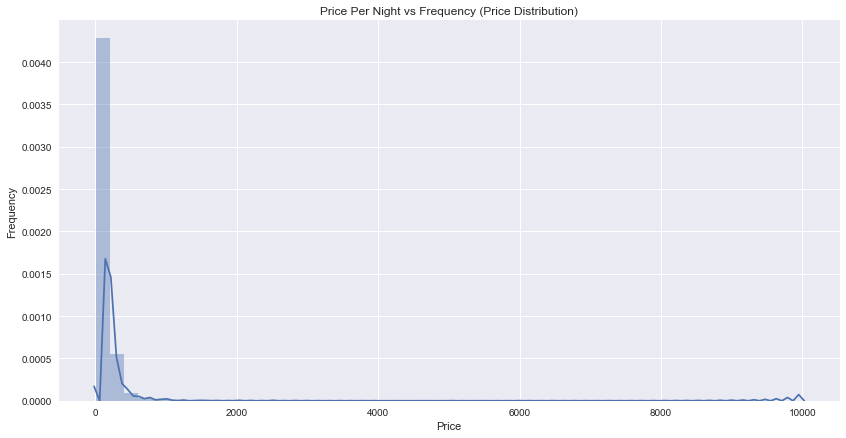

In [6]:
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Price Per Night vs Frequency (Price Distribution)');


In [7]:
# outliers: if price is greater than 2000, I will drop.
df['price'] = np.where(df['price'] > 2000, np.nan, df['price'])
df.dropna(subset=['price'], inplace=True, axis=0)

From here, I noticed that it is skewed to the right, and there are some large outliers in price where there are airbnb rooms for $10,000. 

There are a lot of observations between $50-150.

Seeing our price distribution is skewed to the right, I will do log transformation on price to somewhat change to normal distribution.

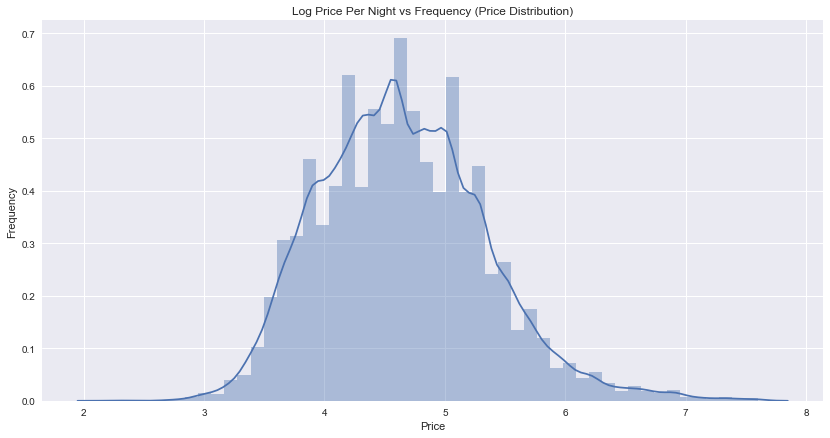

In [8]:
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.log_price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Log Price Per Night vs Frequency (Price Distribution)');
plt.savefig('graphs/log_price_dist.png', dpi = 150)


Here are some distributions plots

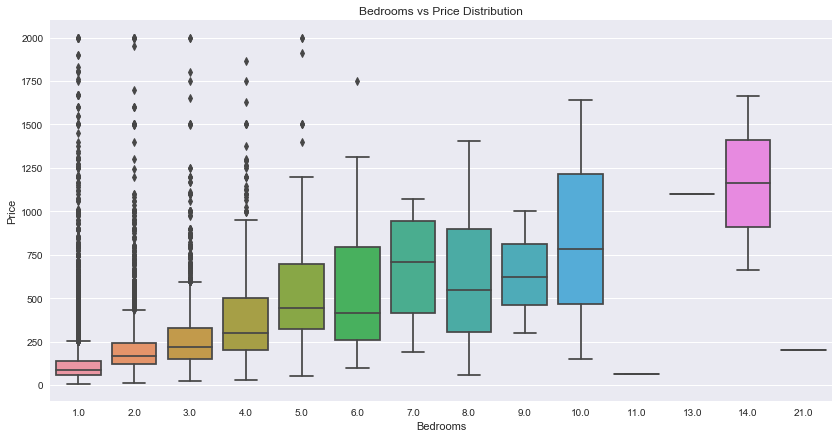

In [9]:
# Bedroom vs Price Distirbution

fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='bedrooms', y="price", data=df)
ax.set(xlabel='Bedrooms', ylabel='Price',title='Bedrooms vs Price Distribution');
# plt.savefig('graphs/bedrooms_vs_price.png', dpi = 150)
# plt.savefig('graphs/bedrooms_vs_price_after_outliers.png', dpi=150)

Here we notice that there is 21 bedrooms in an Airbnb house. We can see this as an outlier. We can also notice that price really varies for 1-3 bedrooms. 

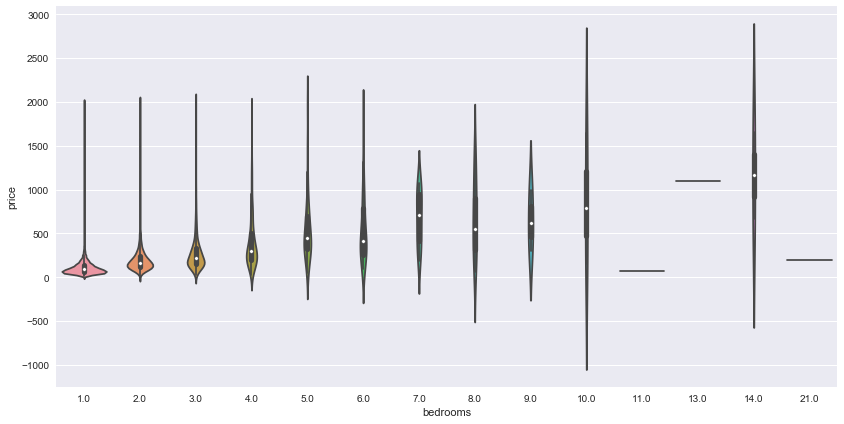

In [10]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.violinplot(x='bedrooms', y='price', data=df)

In [11]:
# fatter -> happens more over time
# skinnier -> more evenly distributed
# white dot = median
# black box inside is boxplot 25-75% quartile range
# if you think about it horizontally, bedroom at 3 is more normally distributed.

In [12]:
df[df['bedrooms'] == 13]
#

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
41512,0,1,0,Manhattan,16,13.0,24.0,1100.0,1,30,60,0,0,0,0,1,1,0,0,79,0.0,7.003065,0.675006,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,0,0


In [13]:
# change 21 bedroom to 1 bedroom because after looking at it, there may be something wrong. 
# There is only 1 bed and can accomodate 2 but has 21 bedrooms which makes no sense.
df[df['bedrooms'] == 21]
df.loc[df.index == 9203, 'bedrooms'] = 1


Although removing outliers by clustering them may make the modeling and prediction values go down, I feel that outliers are very varied, but necessary to not drop them. 

In [14]:
# I will change the outliers for bedroom prices by clustering them and making them equal to 75% quantile value of price
df['price'] = np.where((df['bedrooms'] == 2) & (df['price'] > 1200), df[df['bedrooms'] == 2]['price'].describe()[6], df['price'] )
df['price'] = np.where((df['bedrooms'] == 3) & (df['price'] > 1400), df[df['bedrooms'] == 3]['price'].describe()[6], df['price'] )
df['price'] = np.where((df['bedrooms'] == 4) & (df['price'] > 1400), df[df['bedrooms'] == 4]['price'].describe()[6], df['price'] )
df['price'] = np.where((df['bedrooms'] == 5) & (df['price'] > 1600), df[df['bedrooms'] == 5]['price'].describe()[6], df['price'] )
df['price'] = np.where((df['bedrooms'] == 6) & (df['price'] > 1600), df[df['bedrooms'] == 6]['price'].describe()[6], df['price'] )
# change 21 bedroom to 1 bedroom because after looking at it, there may be something wrong. 
# There is only 1 bed and can accomodate 2 but has 21 bedrooms which makes no sense.
df[df['bedrooms'] == 21]
df.loc[df.index == 9203, 'bedrooms'] = 1



In [15]:
df.head()


,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
0,0,1,1,Manhattan,2,1.0,1.0,175.0,1,30,60,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,Brooklyn,3,1.0,3.0,75.0,1,13,21,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,Brooklyn,2,1.0,1.0,60.0,1,30,60,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,Brooklyn,4,2.0,2.0,175.0,1,12,12,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,Manhattan,2,1.0,1.0,65.0,1,17,44,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


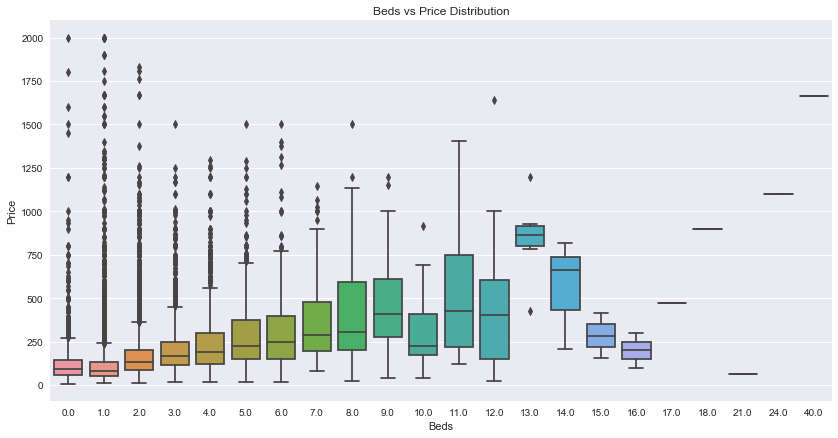

In [16]:
# Bedroom vs Price Distirbution

fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='beds', y="price", data=df)
ax.set(xlabel='Beds', ylabel='Price',title='Beds vs Price Distribution');

Here I ran through some outliers such as when there are 40 beds, and etc. After acquiring going through the URL, I found out that one row with 21 beds has a price of $66.14 which is very little. I found that a bit weird and saw directly from the URL of the listing, it is priced per person. I will change the bed to 1 and other columns such as accommodates and bedrooms accordingly.

In [17]:
df.loc[df.index == 24273, 'beds'] = 1
df.loc[df.index == 24273, 'accommodates'] = 1
df.loc[df.index == 24273, 'bedrooms'] = 1

In [18]:
df.loc[df.index==24273]

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
24273,0,1,0,Bronx,1,1.0,1.0,66.14,1,0,0,5,0,0,1,1,0,1,0,71,2.0,4.191774,3.830835,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0


In [19]:
list(df['price'].value_counts())

[1705,
 1670,
 1386,
 1203,
 1181,
 1110,
 1093,
 1019,
 969,
 960,
 943,
 918,
 918,
 859,
 845,
 759,
 727,
 708,
 612,
 600,
 594,
 573,
 558,
 476,
 420,
 406,
 367,
 365,
 362,
 353,
 353,
 336,
 336,
 311,
 311,
 309,
 291,
 290,
 274,
 245,
 244,
 240,
 239,
 238,
 236,
 228,
 213,
 211,
 204,
 203,
 200,
 192,
 191,
 188,
 178,
 171,
 169,
 168,
 167,
 162,
 161,
 161,
 154,
 153,
 150,
 150,
 148,
 146,
 143,
 142,
 142,
 142,
 141,
 138,
 135,
 135,
 135,
 135,
 132,
 130,
 130,
 128,
 127,
 127,
 126,
 125,
 121,
 120,
 118,
 117,
 114,
 112,
 109,
 109,
 109,
 107,
 105,
 105,
 104,
 104,
 100,
 99,
 99,
 99,
 98,
 96,
 96,
 93,
 92,
 91,
 91,
 90,
 90,
 89,
 89,
 88,
 86,
 79,
 79,
 79,
 78,
 75,
 75,
 74,
 73,
 73,
 73,
 72,
 71,
 71,
 68,
 67,
 67,
 65,
 65,
 65,
 64,
 62,
 61,
 60,
 60,
 60,
 60,
 57,
 57,
 56,
 55,
 55,
 55,
 55,
 54,
 54,
 53,
 53,
 52,
 52,
 52,
 51,
 51,
 51,
 50,
 50,
 50,
 49,
 49,
 49,
 48,
 48,
 47,
 47,
 47,
 46,
 45,
 45,
 44,
 44,
 43,
 43,
 

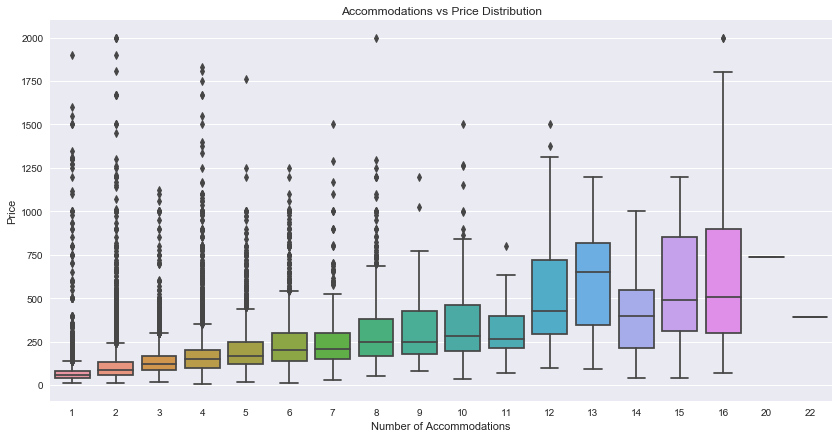

In [20]:
# Accommodates vs Price Distribution

fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='accommodates', y="price", data=df)
ax.set(xlabel='Number of Accommodations', ylabel='Price',title='Accommodations vs Price Distribution');
plt.savefig('graphs/accommodations_vs_price_dist.png', dpi = 150)


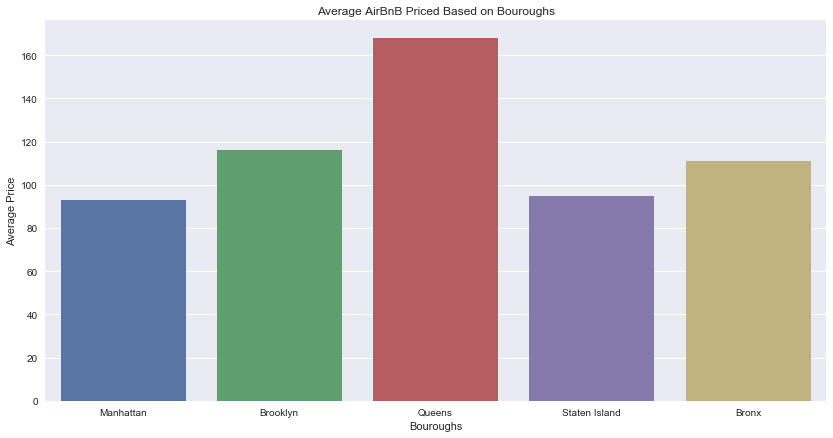

In [21]:
# Average Price of Bouroughs
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(x =df['neighbourhood_group_cleansed'].unique() ,y = df.groupby('neighbourhood_group_cleansed')['price'].mean());
ax.set(xlabel='Bouroughs', ylabel='Average Price',title='Average AirBnB Priced Based on Bouroughs');
plt.savefig('graphs/avg_price_bouroughs_bar.png', dpi = 150)


Here we can see the average AirBnB prices for each of the Bouroughs in New York City. We see that Queens has the highest average price, even more so than the Manhattan.

# Statistical Analysis

## 1. ANOVA TEST 
- Null Hypothesis: Whether the sample price mean of bouroughs are equal
- Alternate Hypothesis: They are not equal

In [22]:
f_stats, p_value =stats.f_oneway(df[df['neighbourhood_group_cleansed'].eq('Manhattan')]['price'], 
               df[df['neighbourhood_group_cleansed'].eq('Brooklyn')]['price'], 
               df[df['neighbourhood_group_cleansed'].eq('Queens')]['price'],
               df[df['neighbourhood_group_cleansed'].eq('Staten Island')]['price'],
               df[df['neighbourhood_group_cleansed'].eq('Bronx')]['price']
                )

In [23]:
print(f'f-stat: {f_stats}, p_value: {p_value}')
print(f'We reject the null hypothesis since our p_value is very small')

f-stat: 616.3631330547496, p_value: 0.0
We reject the null hypothesis since our p_value is very small


## 2. Two Sample T-Test for Means

One of the test I wanted to create was whether the AirBnB price will be same for one with Air conditioning and one without.

Null Hypothesis: mu_ac = mu_no_ac \
Alternative Hypothesis: mu_ac != mu_no_ac

In [24]:
critical_value  = stats.t.ppf(1 - 0.025, len(df['Airconditioning'] - 1))
t_stat, pval =  stats.ttest_ind(df[df['Airconditioning'].eq(1)]['price'], df[df['Airconditioning'].eq(0)]['price'])

print(f'T_STAT: {t_stat}, P_VAL: {pval}, CRIT_VAL: {critical_value}')

print(f'We know that our t-stat falls in rejection area as t_stat value of {t_stat} is greater than critical value of {critical_value} and our p-value is very small. So we can reject the hypothesis')


T_STAT: 26.693010653222498, P_VAL: 8.590330789645525e-156, CRIT_VAL: 1.9600151498790046
We know that our t-stat falls in rejection area as t_stat value of 26.693010653222498 is greater than critical value of 1.9600151498790046 and our p-value is very small. So we can reject the hypothesis


## 3. Chi-Squared Test 
- Buroughs vs Kitchen
- Buroughs vs Street Parking

In [25]:
df

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
0,0,1,1,Manhattan,2,1.0,1.0,175.0,1,30,60,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,Brooklyn,3,1.0,3.0,75.0,1,13,21,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,Brooklyn,2,1.0,1.0,60.0,1,30,60,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,Brooklyn,4,2.0,2.0,175.0,1,12,12,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,Manhattan,2,1.0,1.0,65.0,1,17,44,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,0,1,1,Manhattan,2,1.0,1.0,145.0,1,14,44,0,0,0,0,1,1,0,0,0,6.0,4.976734,5.413953,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
46523,1,1,1,Manhattan,2,1.0,1.0,87.0,1,25,55,0,0,0,1,2,2,0,0,0,1.0,4.465908,9.177431,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
46524,0,1,1,Brooklyn,4,4.0,4.0,59.0,1,30,60,0,0,0,0,1,0,1,0,14,0.0,4.077537,7.195035,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0
46525,0,1,0,Manhattan,2,1.0,1.0,80.0,1,18,48,0,0,0,1,1,1,0,0,0,8.0,4.382027,0.750840,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

#### PART 1: Hypothesis Testing:
Null hypothesis: The proportion of buroughs having kitchen are all equal \
Alternate hypothesis: They are not equal

In [26]:
contin_table = pd.crosstab(df['neighbourhood_group_cleansed'], df['Kitchen'])
stat, p, dof, expected = stats.chi2_contingency(contin_table)
crit_val = stats.chi2.ppf(0.95, dof)
print(f'stat_val: {stat}, p_value: {p}, df: {dof}, expected: {expected}')
print('critical_val: ', crit_val)



stat_val: 531.3073061986422, p_value: 1.1324835421340838e-113, df: 4, expected: [[  106.85424665  1076.14575335]
 [ 1680.5833585  16925.4166415 ]
 [ 1847.41327697 18605.58672303]
 [  522.34835871  5260.65164129]
 [   30.80075918   310.19924082]]
critical_val:  9.487729036781154


We reject the null hypothesis as the p_value is very small

#### PART 2: Hypothesis Testing:
Null hypothesis: The proportion of buroughs having Available Street parking are all equal \
Alternate hypothesis: They are not equal

In [27]:
pd.crosstab(df['neighbourhood_group_cleansed'], df['Freestreetparking'])

Freestreetparking,0,1
neighbourhood_group_cleansed,,
Bronx,548,635
Brooklyn,10565,8041
Manhattan,15906,4547
Queens,2978,2805
Staten Island,110,231


In [28]:
contin_table = pd.crosstab(df['neighbourhood_group_cleansed'], df['Freestreetparking'])
stat, p, dof, expected = stats.chi2_contingency(contin_table)
crit_val = stats.chi2.ppf(0.95, dof)
print(f'stat_val: {stat}, p_value: {p}, df: {dof}, expected: {expected}')
print('critical_val: ', crit_val)



stat_val: 2821.0622629131844, p_value: 0.0, df: 4, expected: [[  768.16160549   414.83839451]
 [12081.50028038  6524.49971962]
 [13280.81937195  7172.18062805]
 [ 3755.09599707  2027.90400293]
 [  221.42274511   119.57725489]]
critical_val:  9.487729036781154


In [29]:
df.drop(columns=['neighbourhood_group_cleansed'], inplace=True, axis=1)

In [30]:
# df = pd.concat([df, pd.get_dummies(df['neighbourhood_cleansed'], drop_first=True)], axis=1)

In [31]:
df.to_csv('final_final_data.csv')